# Vypracování - Backpropagation v třívrstvé síti
- V jazyku Java (či Python) vytvořte program, který umožní trénování třívrstvých sítí (sítí s 1 skrytou vrstvou).
- Vytvořte a natrénujte síť tak, aby dokázala aproximovat Vámi zvolenou funkci z nabídky: sinh, cosh, tanh, coth, exp. (Neočekávám, že si všichni náhodou zvolíte tu stejnou.)
- Proveďte analýzu citlivosti na počet neuronů ve skryté vrstvě, learning rate (parametr učení) a počet epoch učení - porovnejte mse.

## Teorie
### Feed forward neuronové sítě
Feed forward neuronové sítě se skládají s vrstev neuronů, které netwoří cyklus. Existují tři typy neuronů: neurony vstupní vrstvy, neurony skrytých vrstev a neurony výstupní vrstvy.

Vrstva je definována jako vektor aktivačních funkcí vrstvy předhozí
$a^{l} = \sigma(w^{l-1}\cdot a^{l-1} + b^{l})$
kde w je matice vah $w^{l}(|a^{l}|\times|a^{l-1}|)$,
b je vektor biasů a $\sigma(z)$ je libovolnou aktivační funkcí, 

Pro vstupní vrstvu l = 0 platí, že vektor b = 0.



### Backpropagation
Backpropagation je jádrem učícího algoritmu neuronové sítě.
Výstup z feed forward se porovná s požadovanou hodnotou z tréningových dat $\rightarrow$ k tomuto slouží účelová funkce C.

Účelová funkce použitá v této síti: funkce střední kvadratické chyby pro n iterací

$C = \frac{1}{2n}\sum_{x} ||y(x) - a^L(x)||^2$

Chyba ve výstupní vrstvě
$\nabla_a C$ je gradient podle aktivací výstupní vrstvy, který sestává
z parciálních derivací podle vah a biasů (3. a 4.)
1. $\delta^L = \nabla_a C \bigodot \sigma^{\prime}(z^L)$

Chyba ve skryté vrstvě $l$, rekurentní zadání pro chybu ve vrstvě $l+1$


2. $\delta^l = ((w^{l+1})^T \delta^{l+1}) \bigodot \sigma^{\prime}(z^l)$

$\bigodot$ značí Hadamardův součin.


3. $\frac{\partial C}{\partial b^l_j} = \delta^l_j$

4. $\frac{\partial C}{\partial w^l_{j k}} = a_k^{l-1}\delta_j^l$

vektory $\delta$ jsou použity pro aktualizaci biasů a vah.

## Výsledky

In [1]:
import numpy as np
import pandas as pd
from neural_net.neuralnet import NeuralNet
import neural_net.activation_functions as af
from matplotlib import pyplot as plt
import itertools
import json
from pylab import rcParams
rcParams['figure.figsize'] = 16, 6 # resize figures
plt.style.use('bmh')

In [60]:
x = [np.array([np.random.uniform(-1, 1)]) for i in range(1000)]
y = [np.cosh(n) for n in x]
training_data = [(x, y) for x, y in zip(x, y)]
_x = np.linspace(-1, 1, 1000)
_y = np.cosh(_x)

Testovací parametry

In [7]:
neurons = [50, 10, 5, 3, 1]
epochs = [200, 100, 10]
learning_rates = [0.005, 0.05, 0.1, 0.5]

params = itertools.product(neurons, epochs, learning_rates)

Kartézské součiny budou použitý v jednotlivých iteracích

In [ ]:
stats = []
for p in params:
    mse_list = []
    nn = NeuralNet([1, p[0], 1], a_functions=[af.sigmoid, af.linear], a_functions_prime=[af.sigmoid_prime, af.linear_prime])
    print(p, end='\n')
    for e in nn.gradient_descent(labeled_training_dataset=training_data, no_epochs=p[1], mini_batch_size=1, learning_rate=p[2]):
        print('EPOCH: {}\tmse: {}'.format(e['epoch'], e['mse']), end='\r')
        mse_list.append(e['mse'])
    result = {
        'neurons': p[0],
        'epochs': p[1],
        'learning rate': p[2],
        'mse list' : mse_list,
        'last mse': mse_list[-1]
    }
    stats.append(result)
    print('FINISHED')
stats_json = json.dumps(stats)
with open('resources/stats.json', 'w') as f:
    f.write(stats_json)

### Citlivostní analýza

#### Tabulka výstupu analýzy

In [36]:
df = pd.read_json('resources/stats.json')
df.rename(columns={'avg nmse': 'avg mse'}, inplace=True)
df[['neurons', 'epochs', 'learning rate', 'last mse']]

,neurons,epochs,learning rate,last mse
0,50,200,0.005,4.550588e-04
1,50,200,0.050,1.576850e-04
2,50,200,0.100,1.417064e-06
3,50,200,0.500,4.020041e-02
4,50,100,0.005,8.886462e-05
5,50,100,0.050,8.230188e-04
6,50,100,0.100,1.015384e-05
7,50,100,0.500,3.694219e-03
8,50,10,0.005,6.747720e-04
9,50,10,0.050,1.075443e-03


Pro aproximaci byla použita síť s konečnou nejmenší střední kvadratickou chybou *mse*

In [12]:
index_min = df['last mse'].idxmin()
lowest_mse = df.iloc[index_min, :]
lowest_mse

neurons                                                          3
epochs                                                         200
learning rate                                                  0.1
mse list         [0.012408447090325, 0.052534303985128004, 9.88...
last mse                                                1.0713e-07
Name: 38, dtype: object

In [13]:
nn = NeuralNet([1, lowest_mse['neurons'], 1], a_functions=[af.sigmoid, af.linear], a_functions_prime=[af.sigmoid_prime, af.linear_prime])
nn.learn(training_data, lowest_mse['epochs'], 1, lowest_mse['learning rate'])

EPOCH:	200	mse: 1.9022531636549555e-06
DONE


### grafické znázornění

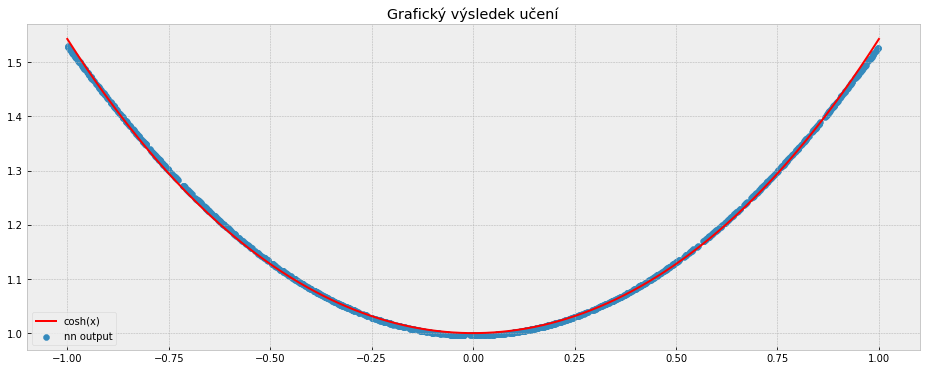

In [50]:
outputs = [nn.feed_forward(a)['z'] for a in x]
plt.scatter(x, outputs, label='nn output')
plt.plot(_x, _y, color='r', label='cosh(x)')
plt.title('Grafický výsledek učení')
plt.legend()

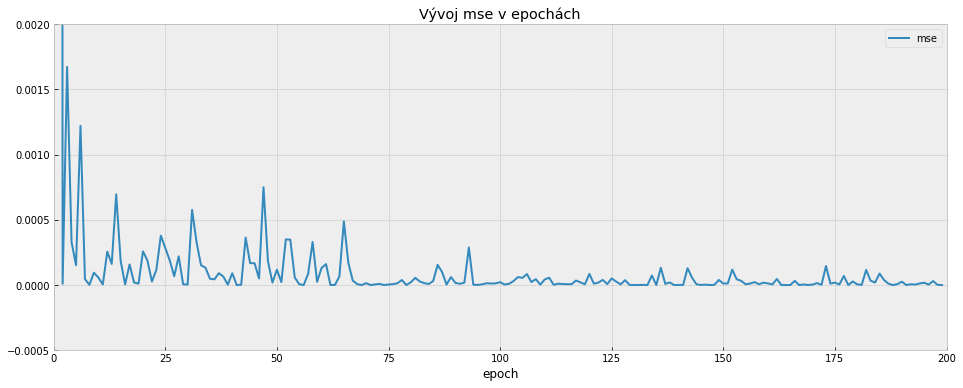

In [59]:
ax, fig = plt.subplots()
fig.set_xlim([0,200])
fig.set_ylim([-0.0005,0.002])
plt.xlabel('epoch')
plt.plot(lowest_mse['mse list'], label='mse')
plt.title('Vývoj mse v epochách')
plt.legend()